In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

path = '/mnt/md0/DAQ/'

In [2]:
path_daq = path + 'SPEC/year_2019/month_01/day_24/'
dataset = '1901240022'
spectrum = np.load(path_daq+dataset+'/HR4000_'+dataset+'_0000.npy').item()
l = spectrum['lambda']
N = len(l)

In [3]:
def integrate_dataset(dataset):
    file = path_daq + str(dataset) + '/HR4000_' + str(dataset) + '_'
    I = np.zeros(N, dtype='double')
    for i in range(100):
        filename = file + '%04d.npy' % i
        I += np.load(filename).item()['I']
    return I

In [44]:
def plot_spectrum(*args, xlim=None, ylim=None, lines=None):
    if xlim is None:
        xlim = (l[0], l[-1])
    plt.figure(figsize=(8, 2), dpi=150)
    ax = plt.subplot()
    peak = 0
    colors = [plt.cm.brg(i) for i in np.linspace(0, 1, len(args))]
    ax.set_prop_cycle('color', colors)
    for arg in args:
        plt.plot(l, arg, linewidth=0.2)
        amax = np.amax(arg)
        if amax > peak:
            peak = amax
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('Counts')
    plt.xlim(xlim)
    if ylim is None:
        ylim = (-1000, 1.05*peak)
    plt.ylim(ylim)
    if lines is not None:
        for i in range(len(lines)):
            line = lines[i]
            plt.plot([line, line], [ylim[0], ylim[1]], 'k--', linewidth=0.2)
    
    plt.show()

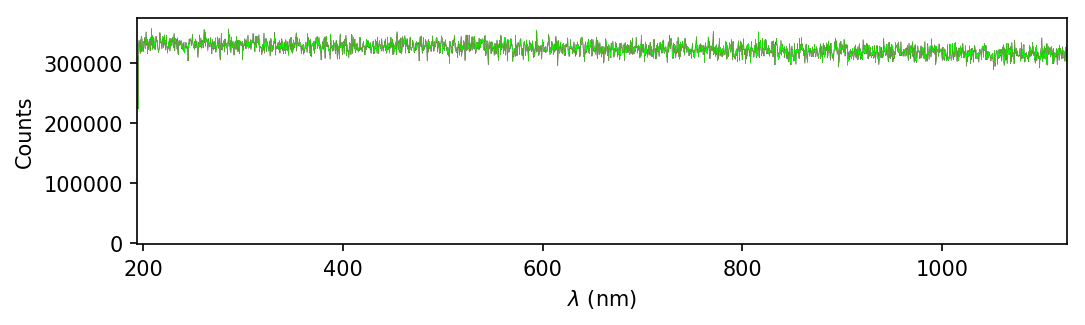

In [26]:
background1 = integrate_dataset(1901240010)
background2 = integrate_dataset(1901240014)
background3 = integrate_dataset(1901240019)
plot_spectrum(background1, background2, background3)

In [27]:
densities = np.array([5e15, 7.5e15, 1e16, 2e16, 5e16, 7.5e16, 1e17, 2e17, 2.5e17])
intensity = np.zeros((len(densities), N))
intensity[0] = integrate_dataset(1901240011)
intensity[1] = integrate_dataset(1901240012)
intensity[2] = integrate_dataset(1901240013)
intensity[3] = integrate_dataset(1901240015)
intensity[4] = integrate_dataset(1901240016)
intensity[5] = integrate_dataset(1901240017)
intensity[6] = integrate_dataset(1901240020)
intensity[7] = integrate_dataset(1901240021)
intensity[8] = integrate_dataset(1901240022)

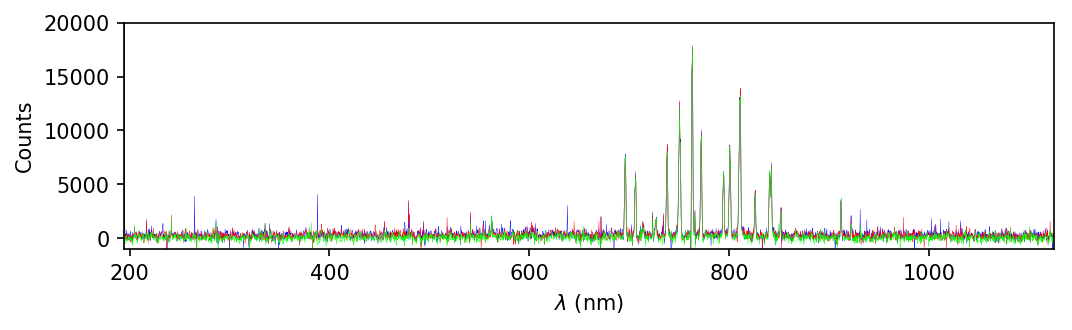

In [38]:
# Look for spurious peaks
plot_spectrum(intensity[8]-background1, intensity[8]-background2, intensity[8]-background3, ylim=(-1000, 20000))

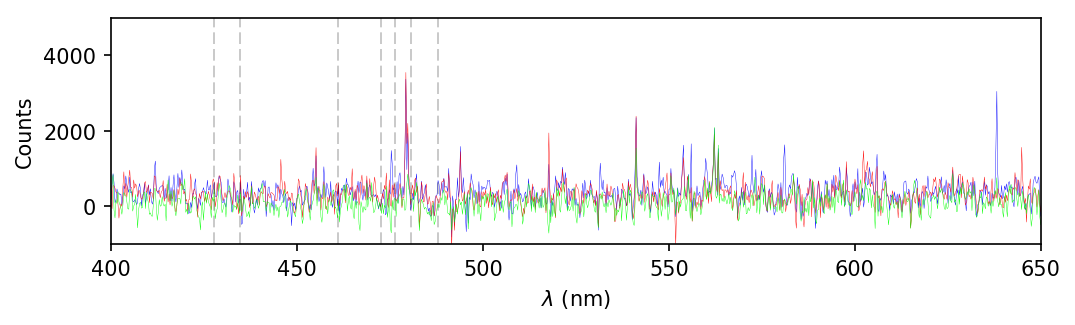

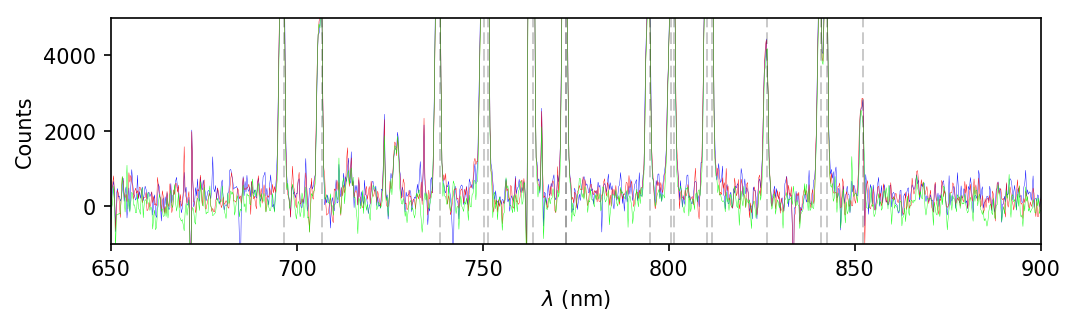

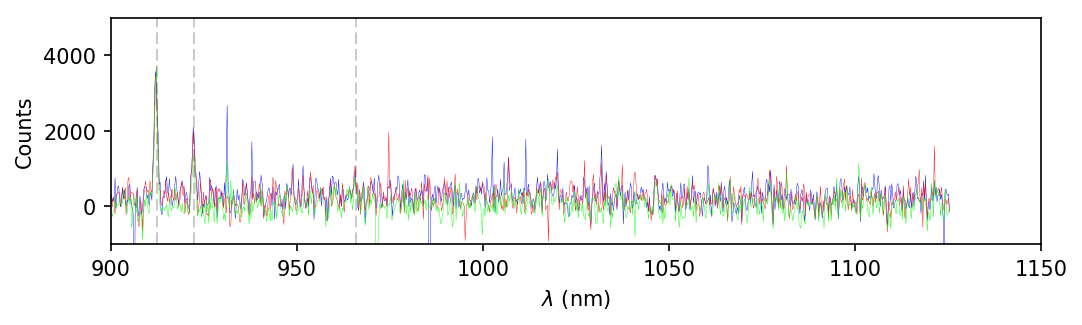

In [72]:
# All argon peaks with intensity 200 or higher
lines = np.array([4277.528, 4348.064, 4609.567, 4726.868, 4764.865, 4806.020, 4879.864, 6965.431, 7067.218,
                  7383.980, 7503.869, 7514.652, 7635.106, 7723.761, 7724.207, 7948.176, 8006.157, 8014.786,
                  8103.693, 8115.311, 8264.522, 8408.210, 8424.648, 8521.442, 9122.967, 9224.499, 9657.786])
lines = lines/10

plot_spectrum(intensity[8]-background1, intensity[8]-background2, intensity[8]-background3,
              xlim=(400, 650), ylim=(-1000, 5000), lines=lines)
plot_spectrum(intensity[8]-background1, intensity[8]-background2, intensity[8]-background3,
              xlim=(650, 900), ylim=(-1000, 5000), lines=lines)
plot_spectrum(intensity[8]-background1, intensity[8]-background2, intensity[8]-background3,
              xlim=(900, 1150), ylim=(-1000, 5000), lines=lines)

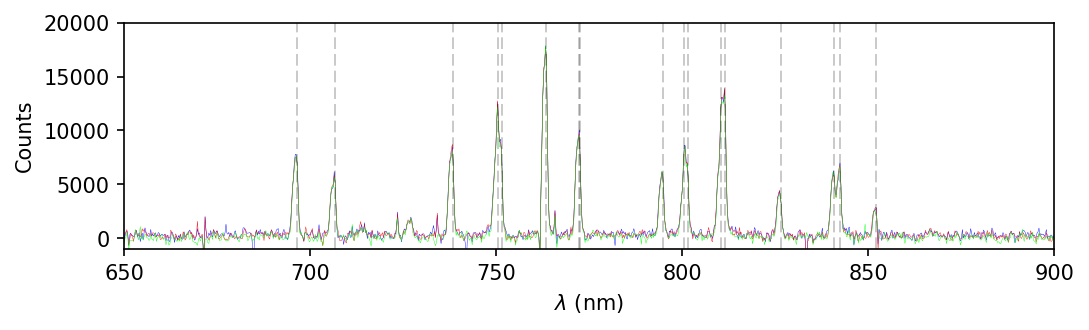

In [73]:
# Show the middle section with the full scale
plot_spectrum(intensity[8]-background1, intensity[8]-background2, intensity[8]-background3,
              xlim=(650, 900), ylim=(-1000, 20000), lines=lines)

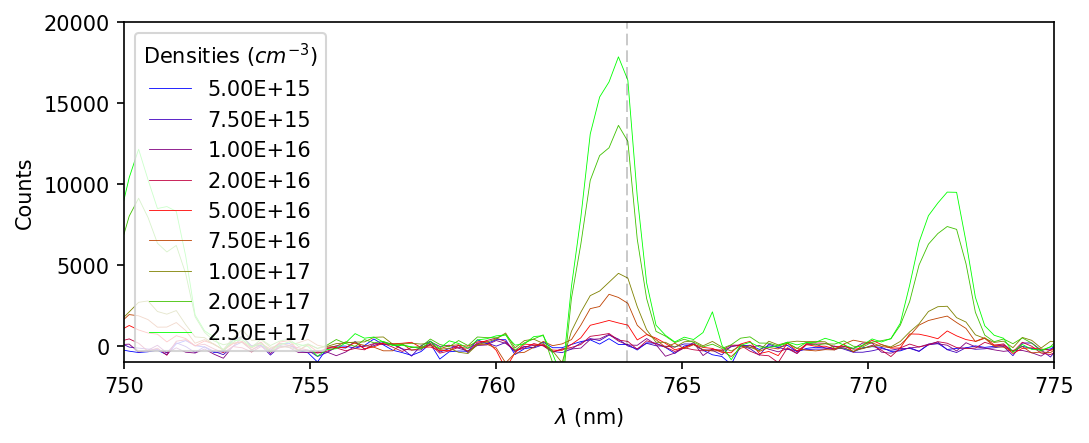

In [113]:
# Let's look at the 763.5
plt.figure(figsize=(8, 3), dpi=150)
ax = plt.subplot()
colors = [plt.cm.brg(i) for i in np.linspace(0, 1, 9)]
ax.set_prop_cycle('color', colors)
linewidth = 0.4
plt.plot(l, intensity[0]-background3, linewidth=linewidth, label='%0.2E' % densities[0])
plt.plot(l, intensity[1]-background3, linewidth=linewidth, label='%0.2E' % densities[1])
plt.plot(l, intensity[2]-background3, linewidth=linewidth, label='%0.2E' % densities[2])
plt.plot(l, intensity[3]-background3, linewidth=linewidth, label='%0.2E' % densities[3])
plt.plot(l, intensity[4]-background3, linewidth=linewidth, label='%0.2E' % densities[4])
plt.plot(l, intensity[5]-background3, linewidth=linewidth, label='%0.2E' % densities[5])
plt.plot(l, intensity[6]-background3, linewidth=linewidth, label='%0.2E' % densities[6])
plt.plot(l, intensity[7]-background3, linewidth=linewidth, label='%0.2E' % densities[7])
plt.plot(l, intensity[8]-background3, linewidth=linewidth, label='%0.2E' % densities[8])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Counts')
plt.xlim(750, 775)
plt.ylim(-1000, 20000)
plt.plot([763.5106, 763.5106], [-1000, 20000], 'k--', linewidth=0.2)
plt.legend(title='Densities ($cm^{-3}$)', loc='upper left')
plt.show()

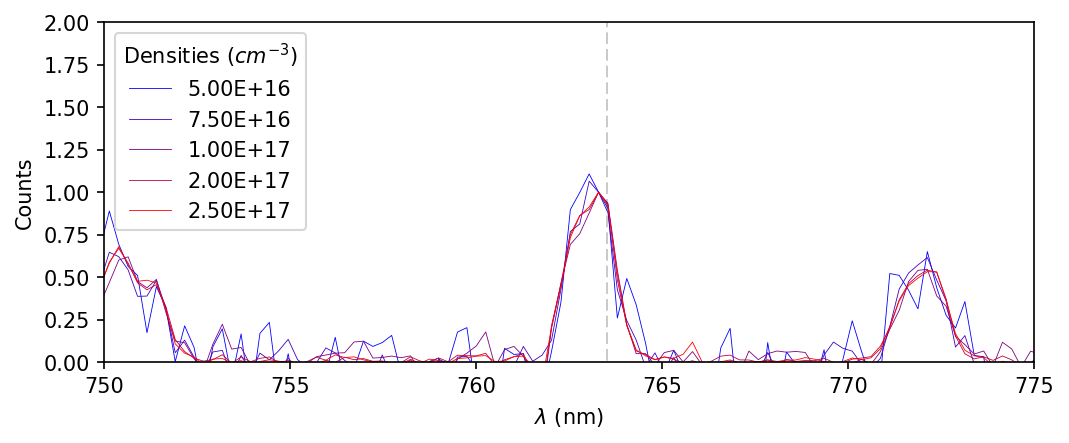

In [119]:
# Let's look at the 763.5
plt.figure(figsize=(8, 3), dpi=150)
ax = plt.subplot()
colors = [plt.cm.brg(i) for i in np.linspace(0, 1, 9)]
ax.set_prop_cycle('color', colors)
linewidth = 0.4
#plt.plot(l, (intensity[0]-background3)/(intensity[0]-background3)[2174], linewidth=linewidth, label='%0.2E' % densities[0])
#plt.plot(l, (intensity[1]-background3)/(intensity[1]-background3)[2174], linewidth=linewidth, label='%0.2E' % densities[1])
#plt.plot(l, (intensity[2]-background3)/(intensity[2]-background3)[2174], linewidth=linewidth, label='%0.2E' % densities[2])
#plt.plot(l, (intensity[3]-background3)/(intensity[3]-background3)[2173], linewidth=linewidth, label='%0.2E' % densities[3])
plt.plot(l, (intensity[4]-background3)/(intensity[4]-background3)[2173], linewidth=linewidth, label='%0.2E' % densities[4])
plt.plot(l, (intensity[5]-background3)/(intensity[5]-background3)[2173], linewidth=linewidth, label='%0.2E' % densities[5])
plt.plot(l, (intensity[6]-background3)/(intensity[6]-background3)[2173], linewidth=linewidth, label='%0.2E' % densities[6])
plt.plot(l, (intensity[7]-background3)/(intensity[7]-background3)[2173], linewidth=linewidth, label='%0.2E' % densities[7])
plt.plot(l, (intensity[8]-background3)/(intensity[8]-background3)[2173], linewidth=linewidth, label='%0.2E' % densities[8])
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Counts')
plt.xlim(750, 775)
plt.ylim(0, 2)
plt.plot([763.5106, 763.5106], [-1000, 20000], 'k--', linewidth=0.2)
plt.legend(title='Densities ($cm^{-3}$)', loc='upper left')
plt.show()